# Fit a model to real data using interior structure models to get a mass-radius relationship

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate
%matplotlib inline

In [2]:
# load data and create a linear interpolator
# load data from file
mass_a, mass_b, radius_a, radius_b, errors = np.loadtxt('mr_all.dat', skiprows=21, unpack=True, usecols=(4, 5, 6, 7, 8))

planet_mass = mass_a + mass_b
planet_radius = radius_a + radius_b

# remove entries with errors
planet_mass_valid = planet_mass[errors == 0]
planet_radius_valid = planet_radius[errors == 0]

In [3]:
# create a function that computes for a given mass, a radius using linear interpolation
rad_interpol = interpolate.interp1d(planet_mass_valid, planet_radius_valid, kind='linear', fill_value='extrapolate')

In [4]:
# test the interpolator 
mass_test = 2.0
interpolated_radius = rad_interpol(mass_test)
print(f'mass = {mass_test}, radius interpolated = {interpolated_radius}')

mass = 2.0, radius interpolated = 2.0691786526554066


## Define a model function and fit to the data

In [5]:
# linear fit with a function that can go through all the data points

# define the fit model
def rad_model(mass, a, b, c, d):
    return 10**(a * np.log10(mass) + np.exp(-d * (np.log10(mass) + c)) + b)

In [6]:
# perform the fit
params, params_cov = optimize.curve_fit(rad_model, planet_mass_valid, planet_radius_valid, p0=[1, 1, 1, 1])

# define the error array
params_err = np.sqrt(np.diag(params_cov))

# use the fitted paramaters to define a best fit function
def rad_fit(mass):
    return rad_model(mass, params[0], params[1], params[2], params[3])

In [7]:
# let's see how good the fit is
n = 500
masses = np.linspace(0.1, 30, n)
# make a guess using interpolator
radii_int = rad_interpol(masses)
# make a guess using best-fit function
radii_fit = rad_fit(masses)

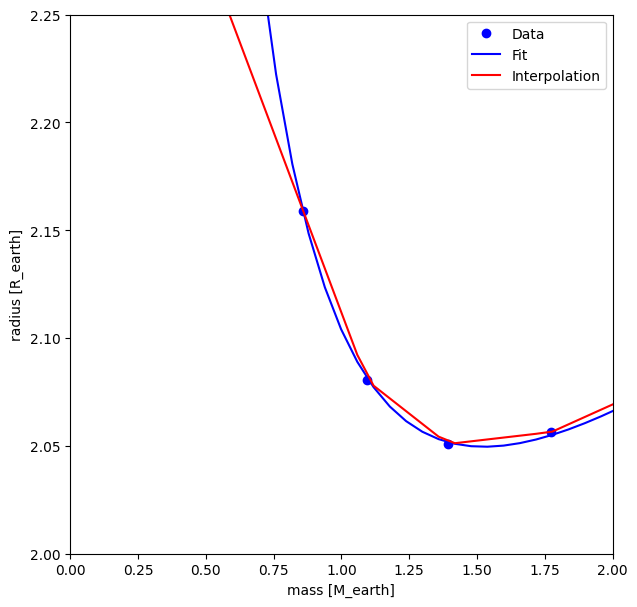

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

# plot data
ax.plot(planet_mass_valid, planet_radius_valid, 'bo', label='Data')
ax.plot(masses, radii_fit, 'b-', label='Fit')
ax.plot(masses, radii_int, 'r-', label='Interpolation')

ax.set_xlabel('mass [M_earth]')
ax.set_ylabel('radius [R_earth]')
ax.legend()
ax.set_ylim(2, 2.25)
ax.set_xlim(0, 2)

plt.show()